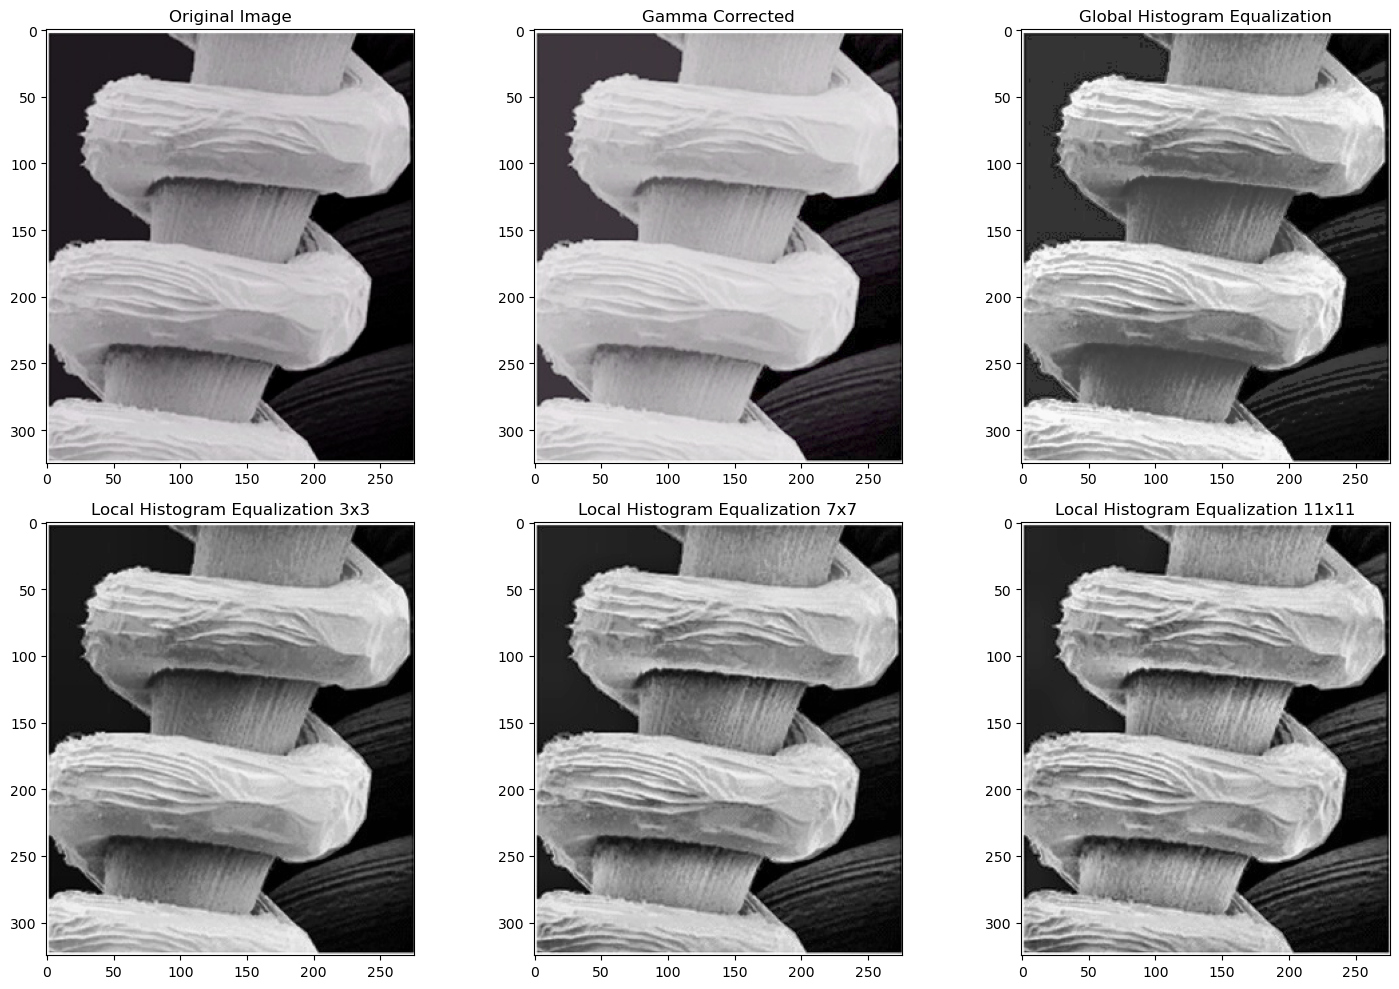

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def global_histogram_equalization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray)

def local_histogram_equalization(image, ksize, clipLimit=2.0):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit, tileGridSize=(ksize,ksize))
    return clahe.apply(gray)

image = cv2.imread("./assignment2_image1.jpg", cv2.IMREAD_COLOR)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# 1. Gamma Correction
gamma_corrected = adjust_gamma(image, 1.5)

# 2. Global Histogram Equalization
global_hist_eq = global_histogram_equalization(image)

# 3. Local Histogram Equalization
local_hist_eq_3x3 = local_histogram_equalization(image, 3,clipLimit=1.5)
local_hist_eq_7x7 = local_histogram_equalization(image, 7,clipLimit=2.0)
local_hist_eq_11x11 = local_histogram_equalization(image, 11,clipLimit=2.5)

# Displaying the enhanced images using matplotlib
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Corrected')

plt.subplot(2, 3, 3)
plt.imshow(global_hist_eq, cmap='gray')
plt.title('Global Histogram Equalization')

plt.subplot(2, 3, 4)
plt.imshow(local_hist_eq_3x3, cmap='gray')
plt.title('Local Histogram Equalization 3x3')

plt.subplot(2, 3, 5)
plt.imshow(local_hist_eq_7x7, cmap='gray')
plt.title('Local Histogram Equalization 7x7')

plt.subplot(2, 3, 6)
plt.imshow(local_hist_eq_11x11, cmap='gray')
plt.title('Local Histogram Equalization 11x11')

plt.tight_layout()
plt.show()

# Save the images to a folder
output_folder = "./OUTPUT/"  # Very sure this directory exists

cv2.imwrite(output_folder + "gamma_corrected.jpg", gamma_corrected);
cv2.imwrite(output_folder + "global_hist_eq.jpg", global_hist_eq);
cv2.imwrite(output_folder + "local_hist_eq_3x3.jpg", local_hist_eq_3x3);
cv2.imwrite(output_folder + "local_hist_eq_7x7.jpg", local_hist_eq_7x7);
cv2.imwrite(output_folder + "local_hist_eq_11x11.jpg", local_hist_eq_11x11);
